In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
cleaned_cust_data  = pd.read_excel("../input/feature-engineering/cleaned_cust_data.xlsx")
cleaned_cust_data.drop(['Unnamed: 0'],1,inplace=True)
cleaned_cust_data.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title
0,31,1,1.00,Z001,nan
1,32,2,1.00,Z005,nan
2,34,4,1.00,Z005,nan
3,35,5,1.00,Z005,nan
4,42,7,1.00,Z008,nan


In [4]:
cleaned_jtd_data  = pd.read_csv("../input/feature-engineering/cleaned_jtd_data.csv")
cleaned_jtd_data.drop(['Unnamed: 0'],1,inplace=True)
cleaned_jtd_data.head()

,DBM Order,Order Item,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,22385,180,OSLCC_SRV31,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.20,MIN,1869.87
1,23910,10,1DM279018170117,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.00,EA,2151.13
2,23910,40,1IS150203BE01,FRONT WHEEL BEARING/ LUBRICATE,P002,1.00,EA,2552.92
3,23910,60,1DM279001990173,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.00,EA,20360.14
4,23910,70,1DM88552790S001SA,Engine Overhaul Kit -Indica Di,P002,1.00,EA,10691.63


In [5]:
cleaned_plant_data  = pd.read_excel("../input/feature-engineering/cleaned_plant_data.xlsx")
cleaned_plant_data.drop(['Unnamed: 0'],1,inplace=True)
cleaned_plant_data.head()

,Plant,Name 1,House number and street,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,"No.117 Poonamallee High Road,",600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,"C-118, Phase 07,",160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,"Unit No.3, Kothari Compound,",400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,"18/1, C Site 4, Sahibabad",201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,"#75, Sy.No. 83/2, Panathur Mai",560087,Bengaluru,MFCB,Karnataka


In [6]:
modified_invoice_data = pd.read_csv("../input/feature-engineering/modified_invoice_data.csv")
modified_invoice_data.drop(['Unnamed: 0'],1,inplace=True)
modified_invoice_data.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Job Card No,Cust Type,Customer No.,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Invoice,Job Card,service_time,clean_District,clean_CITY,Age of cars,Month,Year,Day,Season
0,4,Retail,E4981,00:00:00,2012-04-07,7000000285,15:23:22,2012-04-01,16:14:12,191383,3455.92,MAHINDRA & MAHINDRA,100.00,LOGAN P,2399.95,Running Repairs,11042.62,600032,BC01,THANE,NO,0.00,MH03F9574,4303509,16998.49,SFI_ANANDT,2012-04-07 15:23:22,2012-04-01 16:14:12,143.15,Tamil Nadu,Chennai,13-15,4,2012,1,Summer
1,5,Retail,10,00:00:00,2012-04-04,7000000091,15:55:29,2012-04-02,12:45:04,105073,2310.47,GENERAL MOTORS,0.00,OPTRA,0.00,Paid Service,1469.33,400093,BC01,THANE,NO,0.00,MH43A5790,NaN,3779.80,GOLIVE,2012-04-04 15:55:29,2012-04-02 12:45:04,51.17,Maharashtra,Mumbai,7-9,4,2012,2,Summer
2,6,Retail,7,00:00:00,2012-04-02,7000000016,17:44:03,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Paid Service,0.00,500038,BC04,BALANAGAR,NO,0.00,AP11AB0153,NaN,1340.37,GOLIVE,2012-04-02 17:44:03,2012-04-02 12:47:59,4.93,Telangana,Hyderabad,10-12,4,2012,2,Summer
3,7,Retail,11,00:00:00,2012-04-03,7000000038,12:42:33,2012-04-02,13:12:04,136240,167.36,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Running Repairs,0.00,422001,BC03,NASHIK,NO,0.00,MH15BD5265,NaN,167.36,GOLIVE,2012-04-03 12:42:33,2012-04-02 13:12:04,23.51,Maharashtra,Nashik,10-12,4,2012,2,Summer
4,8,Retail,E12096,00:00:00,2012-04-03,7000000031,10:48:06,2012-04-02,13:58:20,140260,200.02,HYUNDAI,0.00,VERNA,0.00,Running Repairs,2106.92,422007,BC03,NASHIK,NO,0.00,MH15CD961,NaN,2306.94,BC03SA2,2012-04-03 10:48:06,2012-04-02 13:58:20,20.83,Maharashtra,Nashik,10-12,4,2012,2,Summer


Productivity of a Plant: Total Amount generated per hour by per technician at particular plant

1.	Calculate Number of unique Technicians present at the particular Plant over a year

2.	Calculate the total amount of service time in hours over a year 

3.	Calculate the total amount of revenue generated at the respective plant over a year

4.	Productivity = Total Revenue(in year)/(Total Service Time (in year) * Number of Technicians worked (in year))


Note:

- Large number of Technician names are missing and majority of null values is for year 2012 and 2016.

- Very Few values for Technician names for 2012 and 2016. So we will calculate productivity of plants only for 2013, 2014 and 2015

- We will calculate Productivity only for Running repairs types because highest order type is Running Repairs and also as there is chance that different order type for example like Accidental may have more damage and more service time.

In [7]:
unique_tech = modified_invoice_data.groupby(['Plant','Year'],as_index=False)['Technician Name'].count()

In [8]:
unique_tech.head()

,Plant,Year,Technician Name
0,BC01,2012,3
1,BC01,2013,2631
2,BC01,2014,3648
3,BC01,2015,2712
4,BC01,2016,0


In [9]:
years = [2013, 2014, 2015]
new_invoice = modified_invoice_data[(modified_invoice_data['Year'].isin(years))&(modified_invoice_data['Order Type']=='Running Repairs')]
new_invoice.shape

(155282, 36)

In [10]:
operations = {'Plant Name1':'first','Technician Name':'count', 'Total Amt Wtd Tax.':'sum', 'service_time':'sum'}

new_invoice = new_invoice.groupby(['Plant','Year'], as_index=False).agg(operations)
new_invoice.head()

,Plant,Year,Plant Name1,Technician Name,Total Amt Wtd Tax.,service_time
0,BC01,2013,THANE,1260,5508049.56,77168.33
1,BC01,2014,THANE,1385,4577213.98,69498.11
2,BC01,2015,THANE,1259,3360859.63,83471.44
3,BC02,2013,PUNE,922,3357056.77,87497.49
4,BC02,2014,PUNE,1096,3165965.95,97890.43


In [11]:
new_invoice['Productivity'] = new_invoice['Total Amt Wtd Tax.']/(new_invoice['service_time']*new_invoice['Technician Name'])

In [12]:
new_invoice.head()

,Plant,Year,Plant Name1,Technician Name,Total Amt Wtd Tax.,service_time,Productivity
0,BC01,2013,THANE,1260,5508049.56,77168.33,0.06
1,BC01,2014,THANE,1385,4577213.98,69498.11,0.05
2,BC01,2015,THANE,1259,3360859.63,83471.44,0.03
3,BC02,2013,PUNE,922,3357056.77,87497.49,0.04
4,BC02,2014,PUNE,1096,3165965.95,97890.43,0.03


In [13]:
new_invoice = new_invoice.replace(np.inf,np.NaN)
new_invoice.dropna(inplace = True)

1) Top 10 Productive plants for each year

- Note: We can see that Plant X008- AAKASH AUTO (Puducherry) for year 2014 was most productive plant and Plant X128 - SRI LAKSHMI AUTOMOBILES for year 2015. Chances are the number of Technicians for both the plants are less than 2

We are going to drop both the plants and then compare other productive plants for year 2013, 2014 and 2015

In [14]:
top_prod_10 = new_invoice.groupby(['Year']).apply(lambda x: x.sort_values(by = ['Productivity'], ascending = False)).reset_index(drop = True)
top_prod_10 = top_prod_10.groupby(['Year']).head(10)
top_prod_10.head(20)

,Plant,Year,Plant Name1,Technician Name,Total Amt Wtd Tax.,service_time,Productivity
0,BC31,2013,YESHWANTPUR - BANGALORE,16,48292.52,883.96,3.41
1,BC29,2013,NOIDA - 05,216,253679.06,3275.76,0.36
2,BC24,2013,HINJAWADI – PUNE,460,1160495.64,14009.67,0.18
3,BC28,2013,NOIDA - 63,487,1483649.28,18911.90,0.16
4,BC04,2013,BALANAGAR,716,4089347.95,38697.16,0.15
5,BC18,2013,COIMBATORE,953,3655458.14,29325.41,0.13
6,BC21,2013,EDAPPALLY - KOCHI,501,989386.57,16200.52,0.12
7,BC22,2013,GREATER NOIDA,3,297.17,933.39,0.11
8,BC27,2013,GT ROAD - LUDHIANA,503,677307.38,13082.45,0.10
9,BC25,2013,NERUL - NAVI MUMBAI,309,309788.63,11130.44,0.09


In [15]:
top_prod_10.reset_index(inplace = True)
top_prod_10.drop(['index'],1,inplace=True)

In [16]:
top_prod_10.drop(top_prod_10.index[10], inplace=True)

In [17]:
top_prod_10.reset_index(inplace = True)
top_prod_10.drop(['index'],1,inplace=True)

In [18]:
top_prod_10.drop(top_prod_10.index[19], inplace=True)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

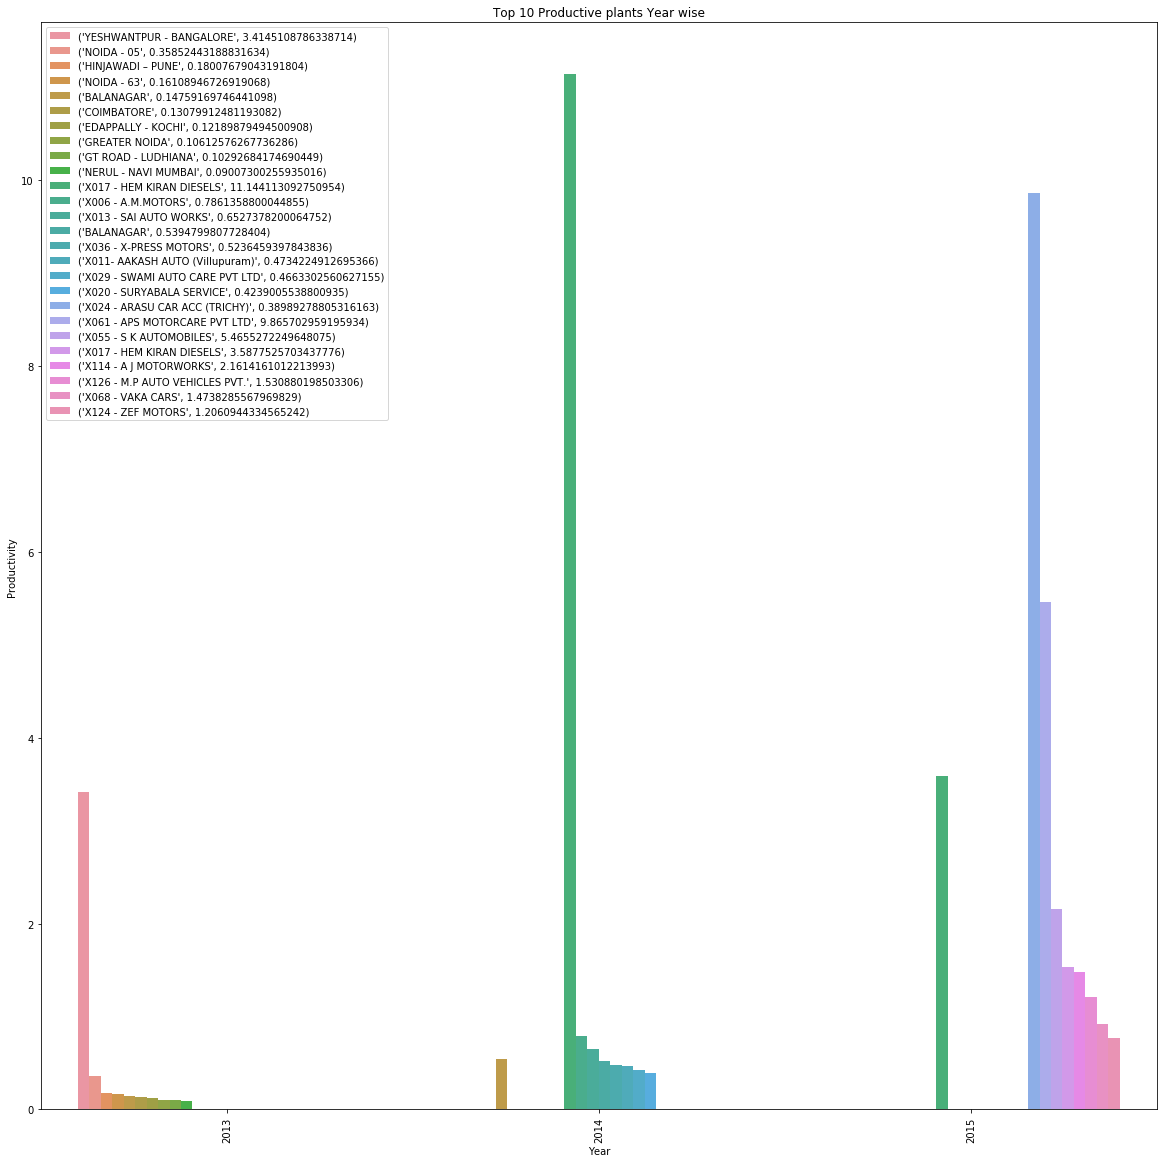

In [19]:
labels = list(top_prod_10['Plant Name1'])
pr = list(top_prod_10['Productivity'])

plt.figure(figsize=(20,20))
g = sns.barplot(x = 'Year', y = 'Productivity', hue = 'Plant Name1', data = top_prod_10)
handles, _ = g.get_legend_handles_labels()
g.legend(handles, zip(labels,pr))
plt.title("Top 10 Productive plants Year wise")
plt.xlabel("Year")
plt.ylabel("Productivity")
plt.xticks(rotation = 90)

2) Top 10 least Productive plants

In [20]:
least_prod_10 = new_invoice.groupby(['Year']).apply(lambda x: x.sort_values(by = ['Productivity'])).reset_index(drop = True)
least_prod_10 = least_prod_10.groupby(['Year']).head(10)
least_prod_10.head(20)

,Plant,Year,Plant Name1,Technician Name,Total Amt Wtd Tax.,service_time,Productivity
0,BC17,2013,NELLORE,1437,4617088.64,132848.08,0.02
1,BC03,2013,NASHIK,2636,8966560.02,92049.84,0.04
2,BC26,2013,NAGPUR,1099,1927460.55,46777.64,0.04
3,BC02,2013,PUNE,922,3357056.77,87497.49,0.04
4,BC15,2013,BELLANDUR - BANGALORE,1553,6719135.94,90269.04,0.05
5,BC05,2013,MADEENAGUDA,1359,6495863.96,94068.39,0.05
6,BC20,2013,MOHAN NAGAR - GAZIABAD,1553,3150366.96,37511.86,0.05
7,BC07,2013,NERKUNDRAM,1009,6089942.90,107976.02,0.06
8,BC01,2013,THANE,1260,5508049.56,77168.33,0.06
9,BC16,2013,AMBATTUR - CHENNAI,1292,5835515.18,74959.94,0.06


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

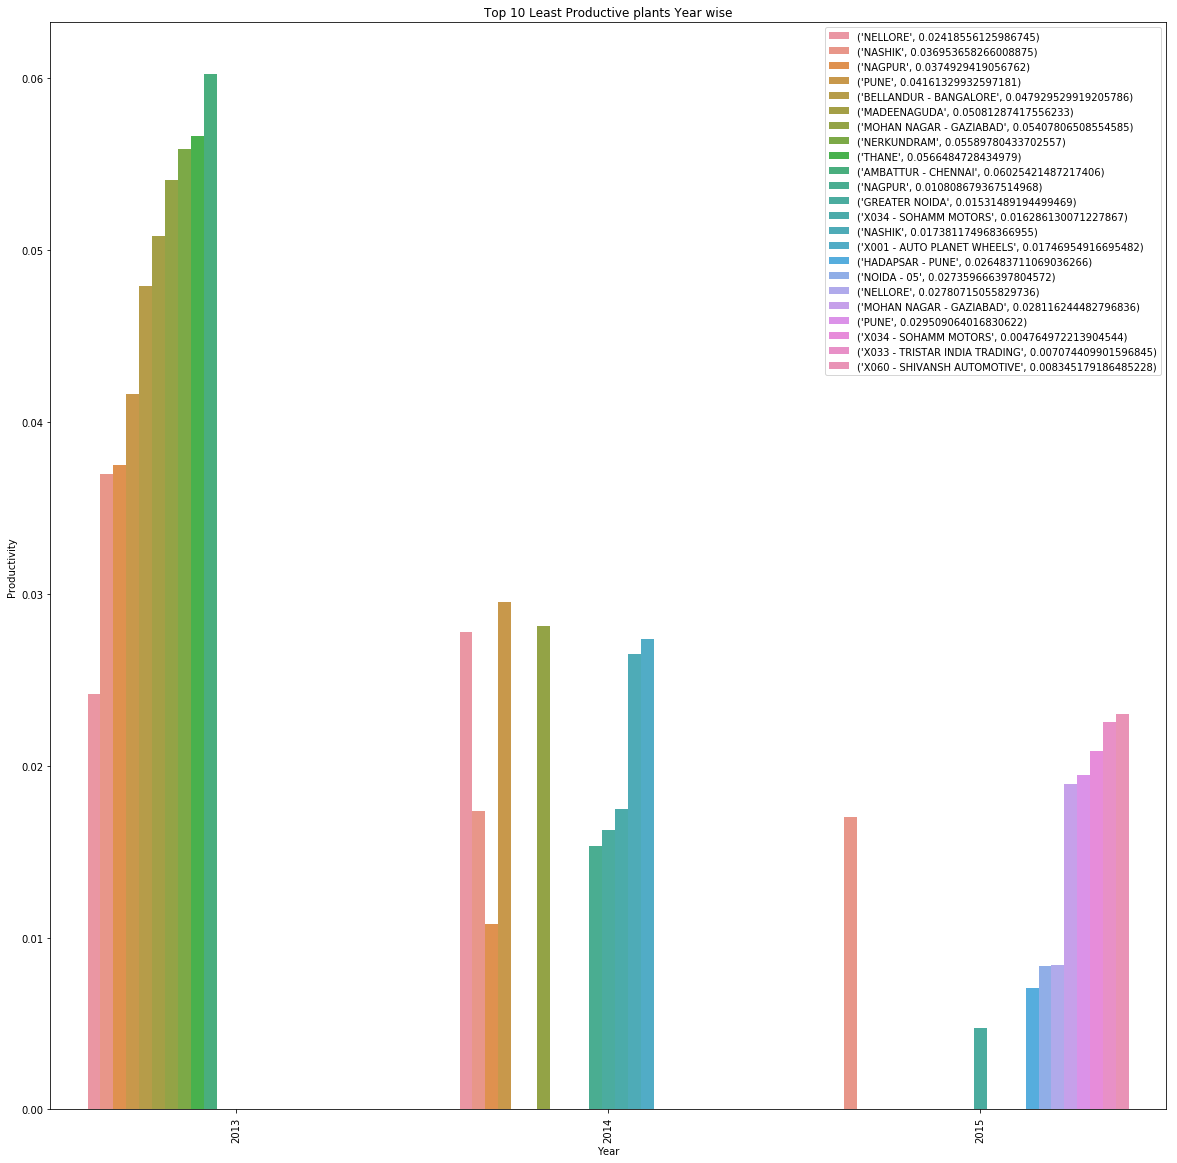

In [21]:
labels = list(least_prod_10['Plant Name1'])
pr = list(least_prod_10['Productivity'])

plt.figure(figsize=(20,20))
g = sns.barplot(x = 'Year', y = 'Productivity', hue = 'Plant Name1', data = least_prod_10)
handles, _ = g.get_legend_handles_labels()
g.legend(handles, zip(labels,pr))
plt.title("Top 10 Least Productive plants Year wise")
plt.xlabel("Year")
plt.ylabel("Productivity")
plt.xticks(rotation = 90)

3) What is the revenue generated, service time and productivity of a plant year wise?

In [22]:
year_2013 = new_invoice[new_invoice['Year'].isin([2013])].copy()
year_2013.head()

,Plant,Year,Plant Name1,Technician Name,Total Amt Wtd Tax.,service_time,Productivity
0,BC01,2013,THANE,1260,5508049.56,77168.33,0.06
3,BC02,2013,PUNE,922,3357056.77,87497.49,0.04
6,BC03,2013,NASHIK,2636,8966560.02,92049.84,0.04
9,BC04,2013,BALANAGAR,716,4089347.95,38697.16,0.15
11,BC05,2013,MADEENAGUDA,1359,6495863.96,94068.39,0.05


In [23]:
year_2013 = year_2013.sort_values(by = 'Productivity', ascending = False)

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
year_2013[['Productivity','Total Amt Wtd Tax.', 'service_time']] = sc.fit_transform(year_2013[['Productivity','Total Amt Wtd Tax.', 'service_time']])
year_2013.head()

,Plant,Year,Plant Name1,Technician Name,Total Amt Wtd Tax.,service_time,Productivity
77,BC31,2013,YESHWANTPUR - BANGALORE,16,0.01,0.00,1.00
72,BC29,2013,NOIDA - 05,216,0.03,0.02,0.10
57,BC24,2013,HINJAWADI – PUNE,460,0.13,0.10,0.05
69,BC28,2013,NOIDA - 63,487,0.17,0.14,0.04
9,BC04,2013,BALANAGAR,716,0.46,0.29,0.04


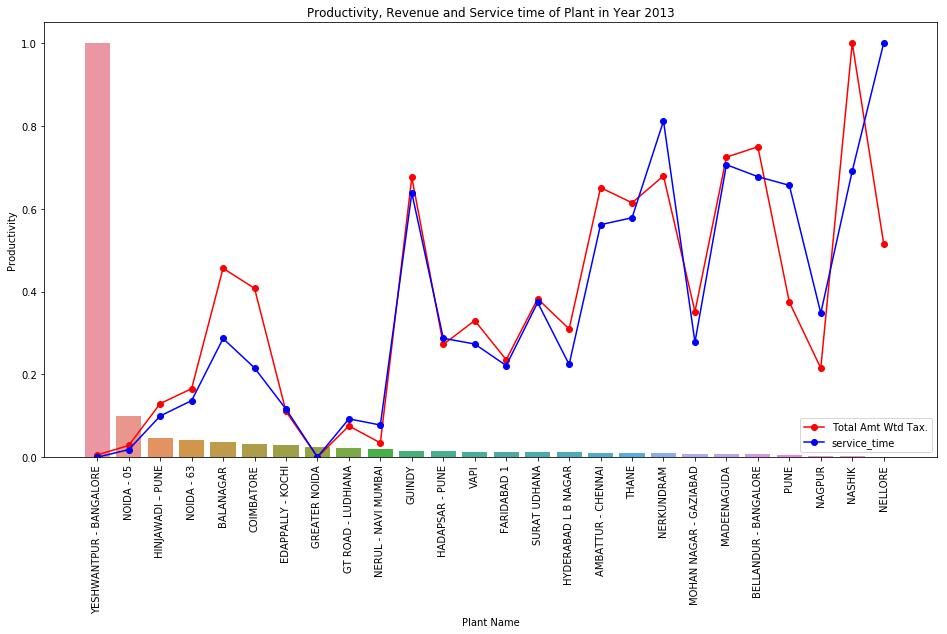

In [25]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'Plant Name1', y= 'Productivity', data = year_2013)
plt.plot(year_2013['Plant Name1'],year_2013['Total Amt Wtd Tax.'], color = 'red', marker = 'o')
plt.plot(year_2013['Plant Name1'], year_2013['service_time'],color = 'blue', marker = 'o')
plt.xticks(rotation = 90)
plt.xlabel("Plant Name")
plt.ylabel("Productivity")
plt.title("Productivity, Revenue and Service time of Plant in Year 2013")
plt.legend()
plt.show()

- Note: We can see plant X008- AAKASH AUTO (Puducherry) has very high productivity and only 2 Technicians. Hence dropping that row.

In [26]:
## Year 2014
year_2014 = new_invoice[new_invoice['Year'].isin([2014])].copy()
year_2014.reset_index(inplace = True)
year_2014.drop('index',1,inplace=True)

In [27]:
year_2014 = year_2014.drop(year_2014.index[33])

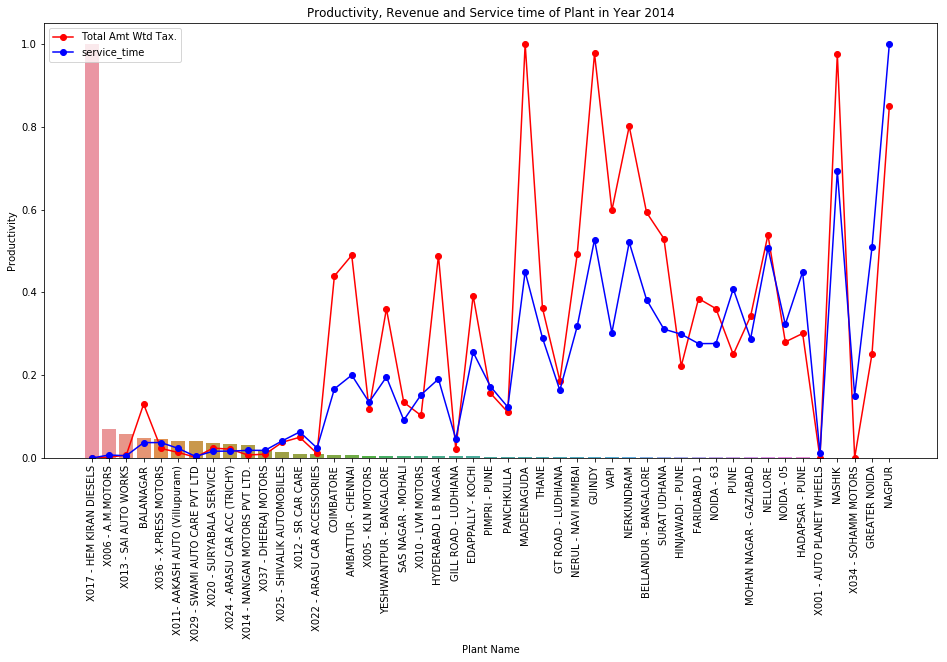

In [28]:
year_2014 = year_2014.sort_values(by = 'Productivity', ascending = False)

sc = MinMaxScaler()
year_2014[['Productivity','Total Amt Wtd Tax.', 'service_time']] = sc.fit_transform(year_2014[['Productivity','Total Amt Wtd Tax.', 'service_time']])

plt.figure(figsize=(16,8))
sns.barplot(x = 'Plant Name1', y= 'Productivity', data = year_2014)
plt.plot(year_2014['Plant Name1'],year_2014['Total Amt Wtd Tax.'], color = 'red', marker = 'o')
plt.plot(year_2014['Plant Name1'], year_2014['service_time'],color = 'blue', marker = 'o')
plt.xticks(rotation = 90)
plt.xlabel("Plant Name")
plt.ylabel("Productivity")
plt.title("Productivity, Revenue and Service time of Plant in Year 2014")
plt.legend()
plt.show()

In [29]:
## Year 2015
year_2015 = new_invoice[new_invoice['Year'].isin([2015])].copy()
year_2015.reset_index(inplace = True)
year_2015.drop('index',1,inplace=True)

In [30]:
year_2015 = year_2015.drop(year_2015.index[101])

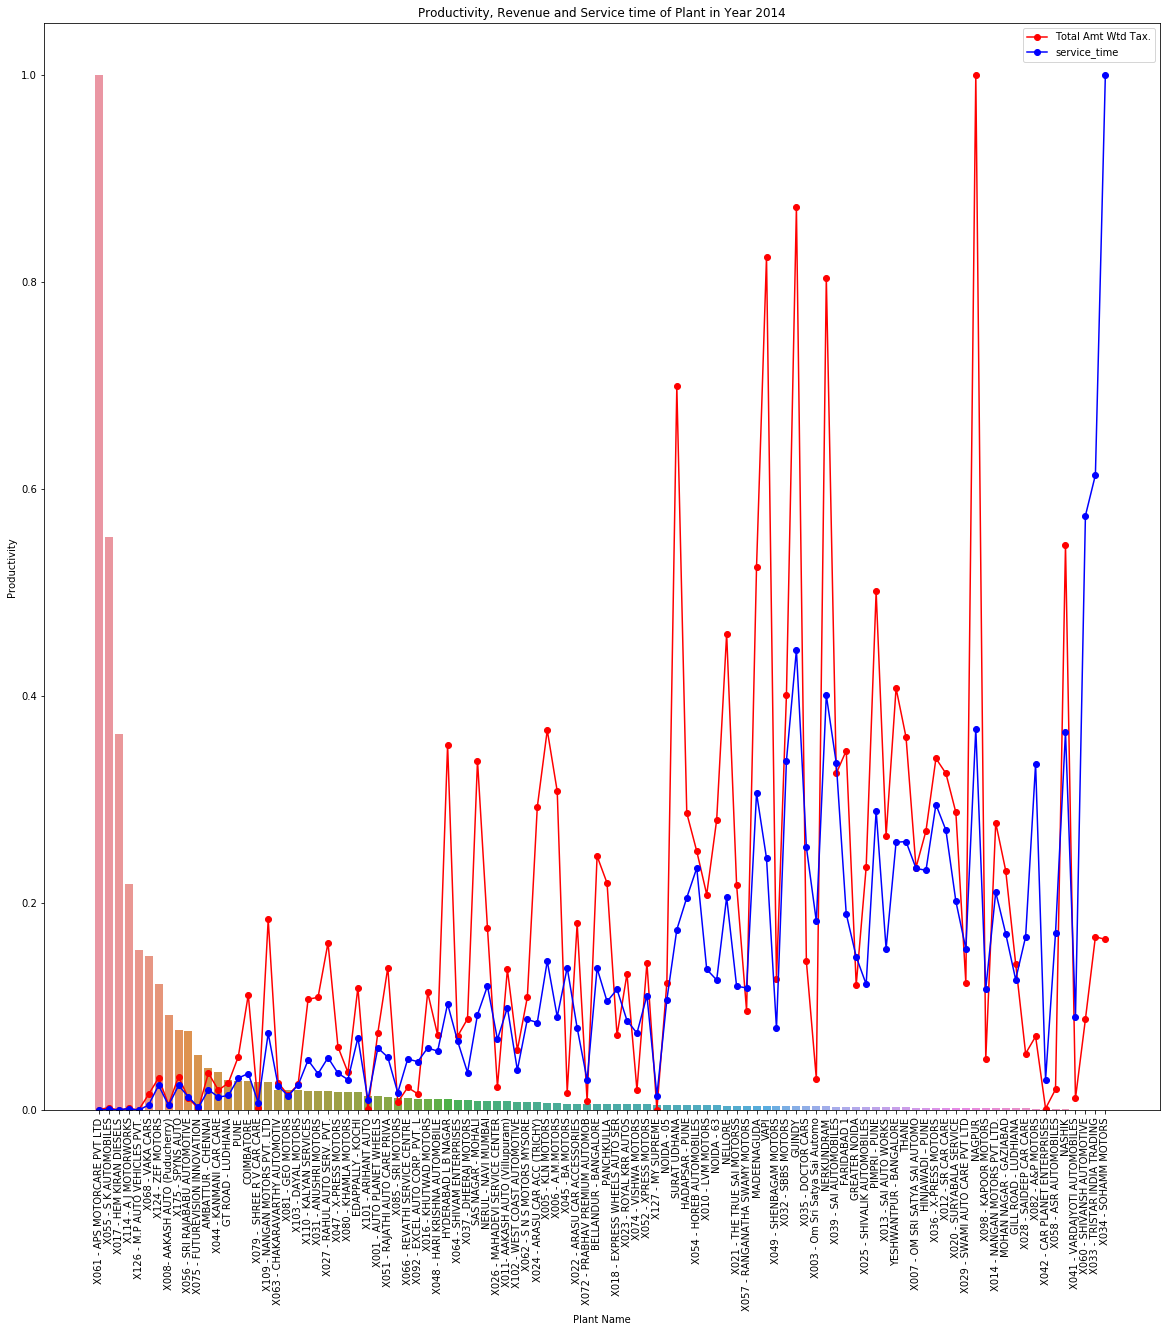

In [31]:
year_2015 = year_2015.sort_values(by = 'Productivity', ascending = False)

sc = MinMaxScaler()
year_2015[['Productivity','Total Amt Wtd Tax.', 'service_time']] = sc.fit_transform(year_2015[['Productivity','Total Amt Wtd Tax.', 'service_time']])

plt.figure(figsize=(20,20))
sns.barplot(x = 'Plant Name1', y= 'Productivity', data = year_2015)
plt.plot(year_2015['Plant Name1'],year_2015['Total Amt Wtd Tax.'], color = 'red', marker = 'o')
plt.plot(year_2015['Plant Name1'], year_2015['service_time'],color = 'blue', marker = 'o')
plt.xticks(rotation = 90)
plt.xlabel("Plant Name")
plt.ylabel("Productivity")
plt.title("Productivity, Revenue and Service time of Plant in Year 2014")
plt.legend()
plt.show()